#04-09-2024 (Housing dataset) Linear Regression

In [7]:
import pandas as pd
dataset  = pd.read_csv('housing - housing.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [8]:
dataset.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [9]:
dataset.duplicated().sum()

0

[[-122.23 37.88 41 ... 126 8.3252 'NEAR BAY']
 [-122.22 37.86 21 ... 1138 8.3014 'NEAR BAY']
 [-122.24 37.85 52 ... 177 7.2574 'NEAR BAY']
 ...
 [-121.22 39.43 17 ... 433 1.7 'INLAND']
 [-121.32 39.43 18 ... 349 1.8672 'INLAND']
 [-121.24 39.37 16 ... 530 2.3886 'INLAND']]


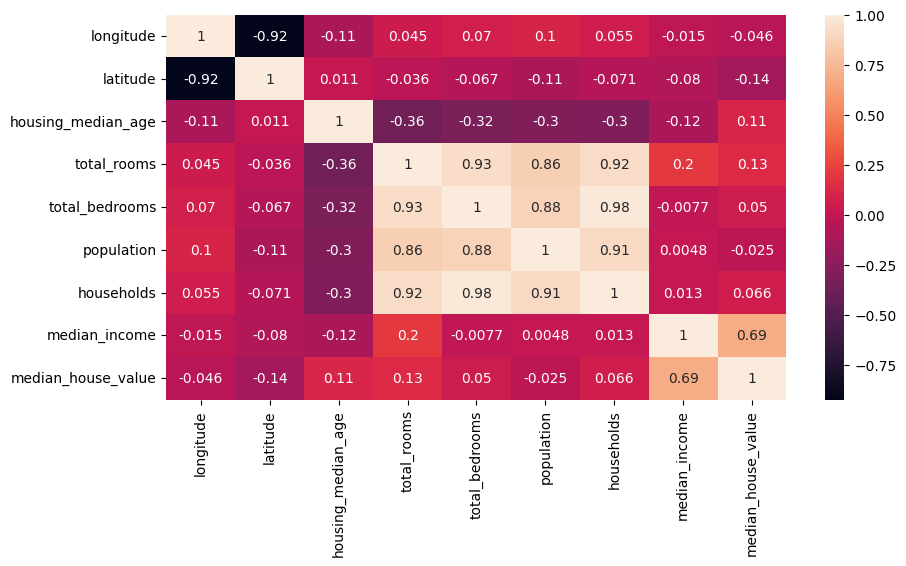

Coeffient Values:  [-0.01886837 -0.10026988  0.42270609  3.84696295 12.97245398 -1.68312602
 17.77438466  0.38364846] [206867.72101547 206919.07745693 206589.1304517  204428.75722638
 198671.45941696 207917.7058241  195641.90791772 206613.77202524]


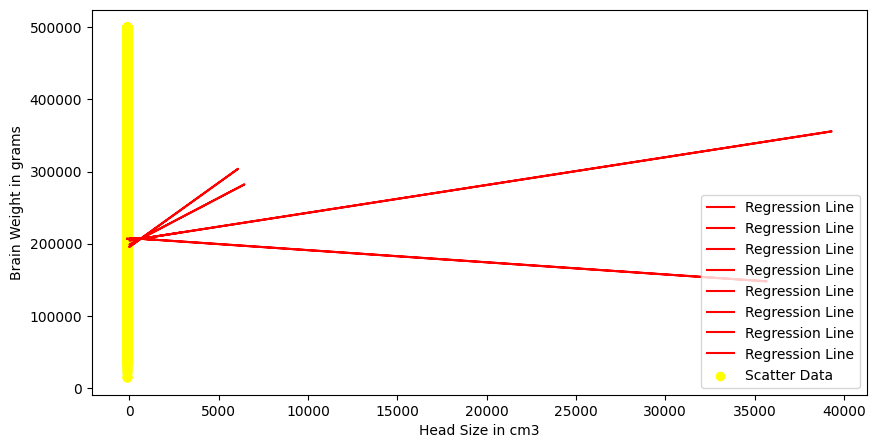

Root mean Sqaure error is  [115392.8195353  115392.80496697 115392.53945274 114828.50795133
 115258.25835029 115369.32649512 115168.88587378 115392.56965341]


In [22]:
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt


x = dataset[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
          'total_bedrooms', 'population', 'households', 'median_income',
          'ocean_proximity']].values
print(x)

numeric_dataset = dataset.drop('ocean_proximity', axis=1)

sea.heatmap(numeric_dataset.corr(),annot=True)
plt.show()

x_numeric = dataset[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
          'total_bedrooms', 'population', 'households', 'median_income']].values

x_numeric = np.nan_to_num(x_numeric, nan=np.nanmean(x_numeric, axis=0))

y = dataset['median_house_value'].values

x_mean = np.mean(x_numeric)
y_mean = np.mean(y)

n = len(x_numeric)
numer = 0
denome = 0
for i in range(n):

    numer += (x_numeric[i] - x_mean) * (y[i] - y_mean)
    denome += (x_numeric[i] - x_mean) ** 2

b1 = numer / denome
b0 = y_mean - (b1 * x_mean)
print("Coeffient Values: ",b1,b0)

%matplotlib inline
plt.rcParams['figure.figsize']= (10.0,5.0)

y_pred = b0 + b1 * x_numeric

plt.plot(x_numeric, y_pred, color="Red", label="Regression Line")

plt.scatter(x[:,0], y, color="yellow", label="Scatter Data")

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

rmse = 0
for i in range(n):
    y_pred = b0 + b1 * x_numeric[i]
    rmse += (y_pred - y[i]) ** 2

rmse = np.sqrt(rmse/n)
print("Root mean Sqaure error is ", rmse)